# Predicting CO2 Emissions

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Dowinloading Dataset

In [56]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df = pd.read_csv(url)

# take a look at the dataset
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exploring Data

In [57]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Selecting Some Features

In [58]:
cdf = df[['MAKE', 'MODEL','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
cdf.head(5)

,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
0,ACURA,ILX,2.0,4,8.5,196,9.9,6.7
1,ACURA,ILX,2.4,4,9.6,221,11.2,7.7
2,ACURA,ILX HYBRID,1.5,4,5.9,136,6.0,5.8
3,ACURA,MDX 4WD,3.5,6,11.1,255,12.7,9.1
4,ACURA,RDX AWD,3.5,6,10.6,244,12.1,8.7


### Plotting Features

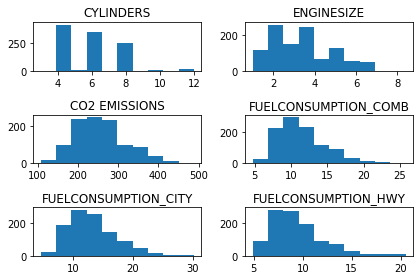

In [59]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]

fig, axs = plt.subplots(3, 2)

axs[0,0].hist(cdf['CYLINDERS'])
axs[0, 0].set_title('CYLINDERS')
axs[0,1].hist(cdf['ENGINESIZE'])
axs[0, 1].set_title('ENGINESIZE')
axs[1,0].hist(cdf['CO2EMISSIONS'])
axs[1,0].set_title('CO2 EMISSIONS')
axs[1,1].hist(cdf['FUELCONSUMPTION_COMB']) 
axs[1,1].set_title('FUELCONSUMPTION_COMB')
axs[2,0].hist(cdf['FUELCONSUMPTION_CITY']) 
axs[2,0].set_title('FUELCONSUMPTION_CITY')
axs[2,1].hist(cdf['FUELCONSUMPTION_HWY']) 
axs[2,1].set_title('FUELCONSUMPTION_HWY')
fig.tight_layout() 


plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

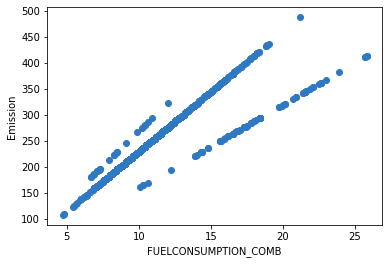

In [60]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='#2f78c2')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

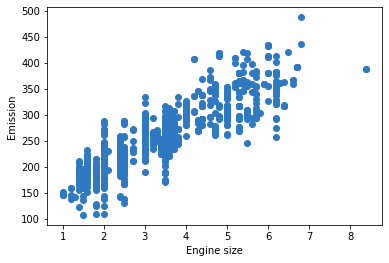

In [61]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='#2f78c2')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

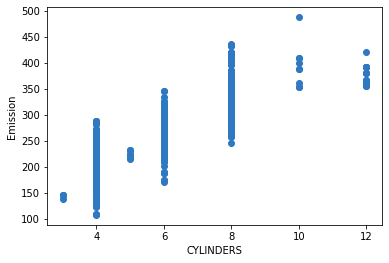

In [62]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='#2f78c2')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

# Modeling

### Creating train and test dataset

We split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [63]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Simple Regression Model
We are trying to estimate CO2 emissions based on "ENGINSIZE" attribute only.

Using sklearn package to model data.

In [64]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.73306962]]
Intercept:  [126.18796483]


### Plotting simple regression fit

Text(0, 0.5, 'Emission')

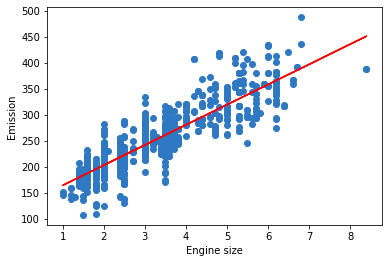

In [65]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='#2f78c2')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. 

In [66]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.09
Residual sum of squares (MSE): 998.91
R2-score: 0.69


## Multiple Regression Model

In this model, CO2 emission is predicted based on multiple independent variables.

In [67]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.34355144  7.52638577  9.78976514]]


#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

#### Predicting data and evaluating the model:

In [68]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 609.35
Variance score: 0.86


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

## Multiple Regression Model With Different Independent Variables
Creating a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. 

In [69]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.40843033  7.01926932  6.72953745  2.64274646]]


### Predicting model and evaluation

In [70]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 613.50
Variance score: 0.86


## Polynomial Regression - Degree = 2

If the relationship between variables are not linear, we can use polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [72]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.79002191 -1.60322419]]
Intercept:  [106.97421402]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Emission')

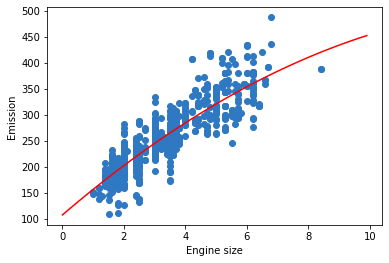

In [73]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='#2f78c2')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [74]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.24
Residual sum of squares (MSE): 997.60
R2-score: 0.70


## Polynomial Regression - Degree = 3

Coefficients:  [[ 0.         34.11108231  2.96677833 -0.37655035]]
Intercept:  [124.79809987]
Mean absolute error: 24.17
Residual sum of squares (MSE): 989.19
R2-score: 0.70


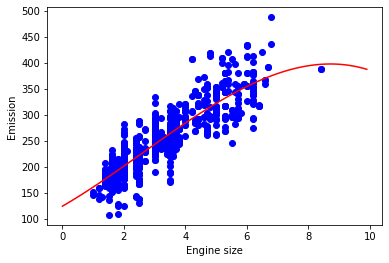

In [75]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )